<center><img src="img/twitter_google_apple.jpeg"/></center>

<center><h1>Twitter Customer Sentiments for Apple and Google Products</h1></center>

<h3> contributors </h3>
<ul><li>Lynette Wangari - lynettewangari26@gmail.com</li>
<li>Jackson Munene - jacmwaniki@gmail.com</li>
<li>Julius Kinyua - juliusczar36@gmail.com</li>
<li>Philip Oluoch - philtonochieng254@gmail.</li></ul>com

# Business Understanding
### Overview
In today's tech-driven world, social media platforms like Twitter have become vital outlets for people to express their thoughts, feelings, and opinions. This project harnesses the power of machine learning and natural language processing (NLP) to understand how users feel about Apple and Google products. By analyzing tweets, we aim to categorize them into positive, neutral, or negative sentiments. This will provide actionable insights to enhance advertising strategies and product development.

With over 100 million Mac users globally and Apple leading the smartphone market with a 28.39% share, understanding customer sentiment is crucial. Google dominates the global search engine market, handling over 90% of all search queries worldwide. Google’s extensive product ecosystem, including services like Google Search, Android, Chrome, and YouTube, reaches billions of users.

However, the growing user base and evolving slang on social media make it challenging to keep up with real-time feedback. Tweets are typically informal and brief, making sentiment analysis more complex. By leveraging machine learning, we aim to accurately determine the sentiment of tweets about Apple and Google products, helping these tech giants monitor customer opinions and make informed decisions to improve their products and services.

#### Goal
Through this project, we seek to provide a systematic approach to sentiment analysis on Twitter, offering valuable insights that will aid Apple, Google and their vendors in enhancing customer satisfaction and loyalty.

### Challenges
The challenge of understanding customer sentiment on Twitter goes beyond just collecting data. In the fast-paced world of social media, language is constantly evolving with new slang and abbreviations popping up daily. This makes it tough to accurately interpret tweets, which are often short, informal, and lack context. We need a systematic method to cut through this noise and extract meaningful insights.

Another significant challenge is aligning product availability with customer preferences. Without a clear understanding of what customers are saying on Twitter, companies risk making stocking decisions that don't match demand. Imagine a store running out of a popular product just because it missed the growing buzz on social media or, conversely, overstocking an item that has fallen out of favor. This mismatch can lead to customer frustration and lost loyalty.

We want to help Apple and Google understand what their customers are truly feeling and saying about their products. This understanding will guide better stocking decisions, ensuring that the right products are available when customers want them, ultimately boosting satisfaction and loyalty.

### Business Problem
The primary business problem is to ensure that Apple, Google, and their vendors can accurately understand and respond to customer sentiments expressed on Twitter. Misclassifying negative sentiments as positive can lead to misleading insights, resulting in poor strategic decisions.

Accurate sentiment prediction is essential to gauge whether a tweet reflects positive, neutral, or negative feelings about Apple or Google products. Misinterpretation can skew the assessment of customer satisfaction, impacting marketing strategies and product development negatively. Moreover, understanding sentiment is critical for making data-driven stocking decisions. A clear insight into customer opinions prevents stocking issues that don't align with customer preferences, ensuring that products are available when and where they are needed, thus maintaining customer satisfaction and loyalty.

### Research Questions

- What are the main sentiments expressed by customers on Twitter regarding iPhone and Google products?

- Which specific features of iPhone and Google products are most commonly praised or criticized by users on Twitter?

- Which machine learning model is the most effective for sentiment analysis?
  
- How can sentiment analysis of tweets guide Apple and Google in optimizing their product assortment and marketing strategies?

In [106]:
# import necessary libraries
import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier

# Data Understanding
### Data Collection
The dataset, sourced from CrowdFlower via data.world, consists of over 9,000 tweets. These tweets have been meticulously rated by human annotators to classify their sentiment as positive, negative, or neutral. The dataset captures a wide range of user opinions related to various Apple and Google products, making it a rich source for sentiment analysis.

In [109]:
class DataLoader:
    def __init__(self, data_path):
        self.data_path = data_path
        self.df = None

    def load_data(self):
        self.df = pd.read_csv(self.data_path, encoding='latin1')
        # print(self.df.head())
        return self.df


### Initial Data Exploration
We began by conducting an initial exploration of the data to understand its structure and contents. This involved:
 <ul><li>-Examining the Columns: Our dataset included columns such as tweet, brand_product, and sentiment, among others.</li>
 <li>-Assessing Data Quality: We checked for missing values and inconsistencies to ensure the reliability of our analysis.</li></ul>

In [112]:
# Call Dataloader with path defined
data_path = 'tweets.csv'

# Load the data
loader = DataLoader(data_path)
df = loader.load_data()
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [114]:
# Total Missing values checker
print(df.isna().sum())

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64


In [116]:
# Data types, columns and missing values in one place
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


### Data Preprocessing
In this step, we implemented the DataPreprocessor class to clean and prepare our dataset for analysis. This crucial step ensures that the data is in a suitable format for modeling, removing any inconsistencies and standardizing the information.

This step entails smaller steps like:
- Renaming Columns
- Mapping Sentiment Values
- Handling Missing Values
- Filling Missing Brand/Product Information
- Dropping Remaining Missing Values
- Text Preprocessing: The preprocess_text method is called to clean the tweet text by removing punctuation and converting it to lowercase.

#### What did we achieve from this?
- Data Cleanliness: The dataset was cleaned and standardized, with missing values handled appropriately.
- Enhanced Information: Missing brand_product information was filled, reducing data loss.
- Visual Insights: The visualizations provided clear insights into the distribution of brand mentions and sentiments, highlighting key areas of interest and concern.

In [122]:
# initialize preprocessing step
class DataPreprocessor:
    def __init__(self, df):
        self.df = df

    def preprocess(self):
        self.df.rename(columns={'tweet_text': 'tweet', 'emotion_in_tweet_is_directed_at': 'brand_product', 'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'}, inplace=True)
        dict_sent = {'No emotion toward brand or product': "No emotion", 'Positive emotion': 'Positive', 'Negative emotion': 'Negative', "I can't tell": 'Invalid'}
        self.df['sentiment'] = self.df['sentiment'].map(dict_sent)
        self.df['tweet'].dropna(inplace=True)
        self.df.drop_duplicates(inplace=True)
        self.df.drop(index=self.df[self.df['tweet'].isna()].index, inplace=True)
        self.fill_missing_brand_product()
        self.df.dropna(inplace=True)
        self.df = self.preprocess_text()
        return self.df

    def preprocess_text(self):
        self.df['cleaned_tweet'] = self.df['tweet'].apply(lambda x: re.sub(f'[{string.punctuation}]', '', x.lower()))
        return self.df

    def fill_missing_brand_product(self):
        categories = np.array(['iPad', 'Apple', 'iPad', 'iPhone', 'Google', 'Android'])
        for i, row in self.df.iterrows():
            if pd.isnull(row['brand_product']):
                for category in np.concatenate((categories, np.char.lower(categories))):
                    if category in row['tweet']:
                        self.df.loc[i, 'brand_product'] = category
                        break

    def show_distribution(self):
        # Ensure there are no null values in 'brand_product' and 'sentiment' columns
        df_non_null = self.df.dropna(subset=['brand_product', 'sentiment'])

        # Distribution of Brand-Product
        brand_counts = df_non_null['brand_product'].value_counts()
        brand_counts = brand_counts.sort_values(ascending=True)

        plt.figure(figsize=(10, 6))
        colors = [
            'skyblue' if brand.lower() in [
                'ipad', 'apple', 'ipad or iphone app', 'iphone', 'other apple product or service'
            ] else 'limegreen' for brand in brand_counts.index
        ]

        plt.barh(brand_counts.index, brand_counts.values, color=colors)
        plt.xlabel('Count')
        plt.ylabel('Brand-Product')
        plt.title('Distribution of Brand-Product')
        plt.xticks(rotation=60)
        plt.tight_layout()
        plt.show()

        # Sentiment Counts by Brand
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df_non_null, x='sentiment', hue='brand_product', palette='Set2')
        plt.title('Sentiment Counts by Brand')
        plt.xlabel('Sentiment')
        plt.ylabel('Count')
        plt.legend(title='Brand')
        plt.show()


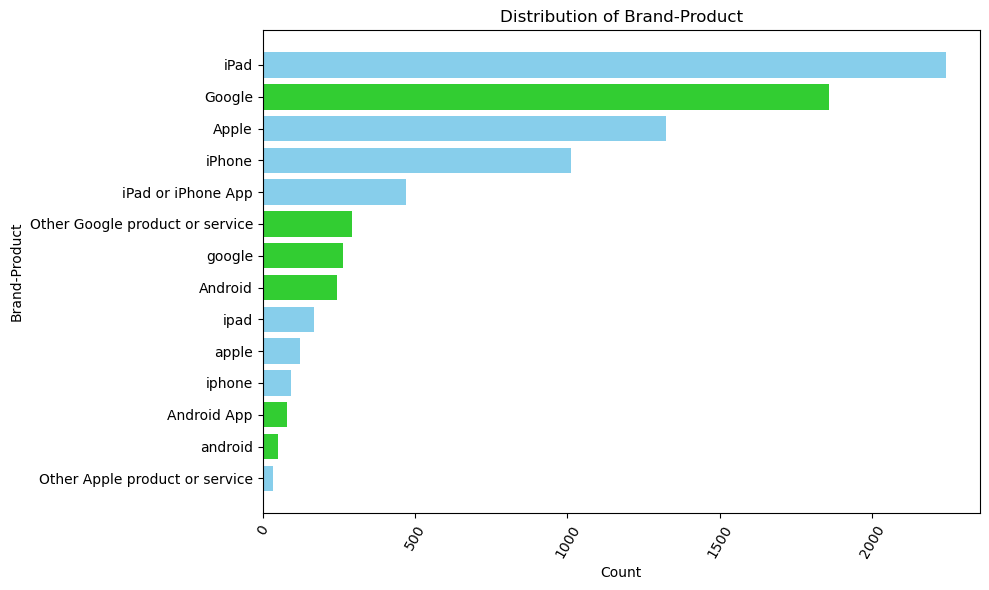

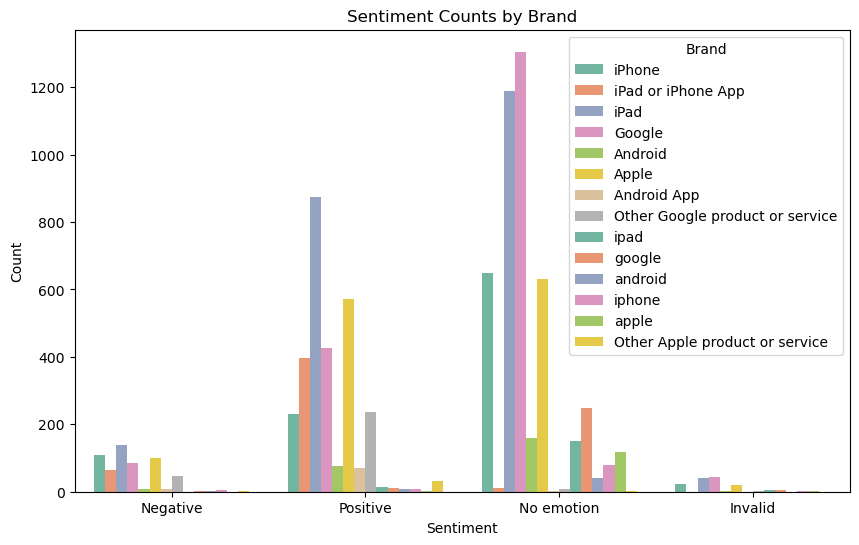

,tweet,brand_product,sentiment,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,wesley83 i have a 3g iphone after 3 hrs tweeti...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,jessedee know about fludapp awesome ipadiphon...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,swonderlin can not wait for ipad 2 also they s...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,sxsw i hope this years festival isnt as crashy...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,sxtxstate great stuff on fri sxsw marissa maye...


In [124]:
preprocessor = DataPreprocessor(df)
df = preprocessor.preprocess()
preprocessor.show_distribution()
df.head()

### Text Vectorization
The TextVectorizer class is designed to convert cleaned tweet text into numerical features suitable for machine learning models. Additionally, it provides methods to visualize the distribution and frequency of words in the dataset, both overall and by sentiment category. Here's a detailed explanation of the steps taken in the TextVectorizer class and the results obtained.
- After initializing the function, The vectorize method transforms the cleaned tweet text into a numerical representation using TF-IDF (Term Frequency-Inverse Document Frequency). This representation captures the importance of each word in the context of the entire dataset. The method also splits the data into training and testing sets for model evaluation.
- The show_word_distribution method visualizes the top 20 words in the entire dataset by their frequency. This helps in understanding the most common terms used across all tweets.
- The show_wordcloud method creates a word cloud for the entire dataset, providing a visual representation of the most common words. This is a quick way to grasp the prevalent themes in the tweets.
- The show_sentiment_word_distribution method visualizes the top 20 words in tweets with a specific sentiment (e.g., Positive or Negative). This helps in understanding the language and terms associated with different sentiments.
- The show_sentiment_wordcloud method creates a word cloud for tweets with a specific sentiment, providing a visual representation of the most common words for that sentiment. This visualization can reveal distinctive language patterns associated with different sentiments.

In [74]:
class TextVectorizer:
    def __init__(self, df):
        self.df = df
        self.vectorizer = None
        self.X = None
        self.y = None

    def vectorize(self):
        self.vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
        self.X = self.vectorizer.fit_transform(self.df['cleaned_tweet'])
        self.y = self.df['sentiment']
        return train_test_split(self.X, self.y, test_size=0.2, random_state=42)

    def show_word_distribution(self):
        word_freq = self.vectorizer.get_feature_names_out()
        sum_words = self.X.sum(axis=0)
        word_freq = [(word, sum_words[0, idx]) for word, idx in self.vectorizer.vocabulary_.items()]
        word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

        words = [wf[0] for wf in word_freq[:20]]
        counts = [wf[1] for wf in word_freq[:20]]

        plt.figure(figsize=(12, 6))
        sns.barplot(x=counts, y=words)
        plt.title('Top 20 Words by Frequency')
        plt.show()

    def show_wordcloud(self):
        all_tweets_text = ' '.join(self.df['cleaned_tweet'])

        wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=40, scale=3, random_state=42)
        wordcloud.generate(all_tweets_text)

        plt.figure(figsize=(12, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Cleaned Tweets')
        plt.show()

    def show_sentiment_word_distribution(self, sentiment_label):
        sentiment_df = self.df[self.df['sentiment'] == sentiment_label]
        sentiment_X = self.vectorizer.transform(sentiment_df['cleaned_tweet'])

        sum_words = sentiment_X.sum(axis=0)
        word_freq = [(word, sum_words[0, idx]) for word, idx in self.vectorizer.vocabulary_.items()]
        word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

        words = [wf[0] for wf in word_freq[:20]]
        counts = [wf[1] for wf in word_freq[:20]]

        plt.figure(figsize=(12, 6))
        sns.barplot(x=counts, y=words)
        plt.title(f'Top 20 Words by Frequency in {sentiment_label} Tweets')
        plt.show()

    def show_sentiment_wordcloud(self, sentiment_label):
        sentiment_df = self.df[self.df['sentiment'] == sentiment_label]
        all_tweets_text = ' '.join(sentiment_df['cleaned_tweet'])

        wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=40, scale=3, random_state=42)
        wordcloud.generate(all_tweets_text)

        plt.figure(figsize=(12, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud of {sentiment_label} Tweets')
        plt.show()



C:\Users\jack\Documents\Flatiron\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


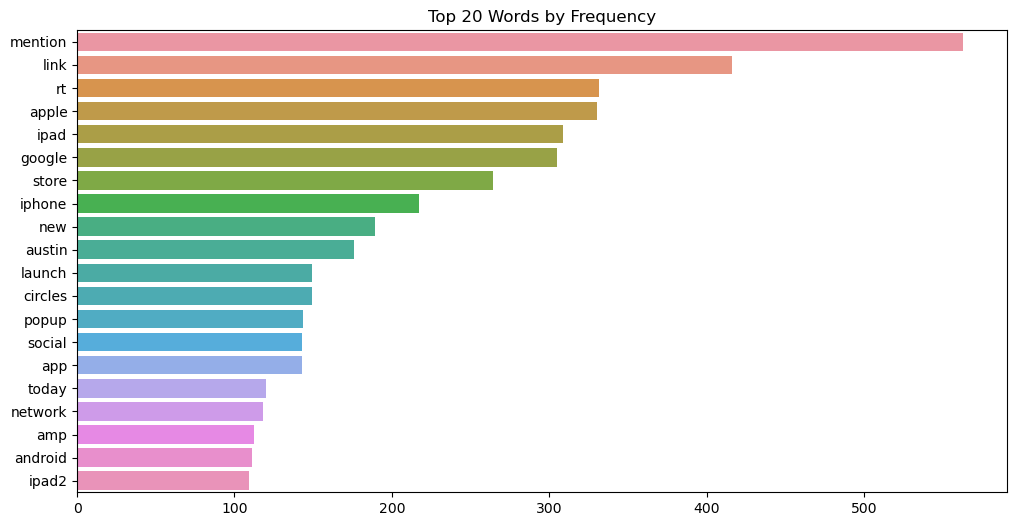

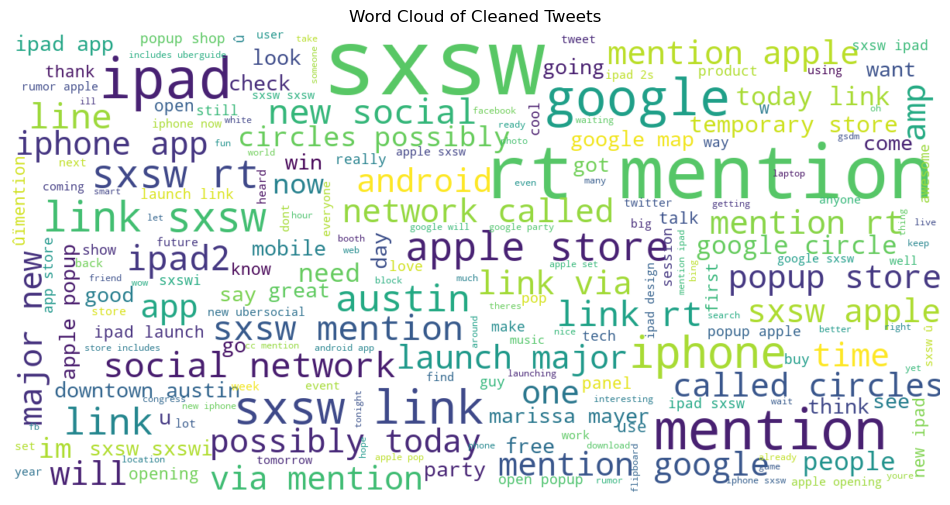

C:\Users\jack\Documents\Flatiron\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


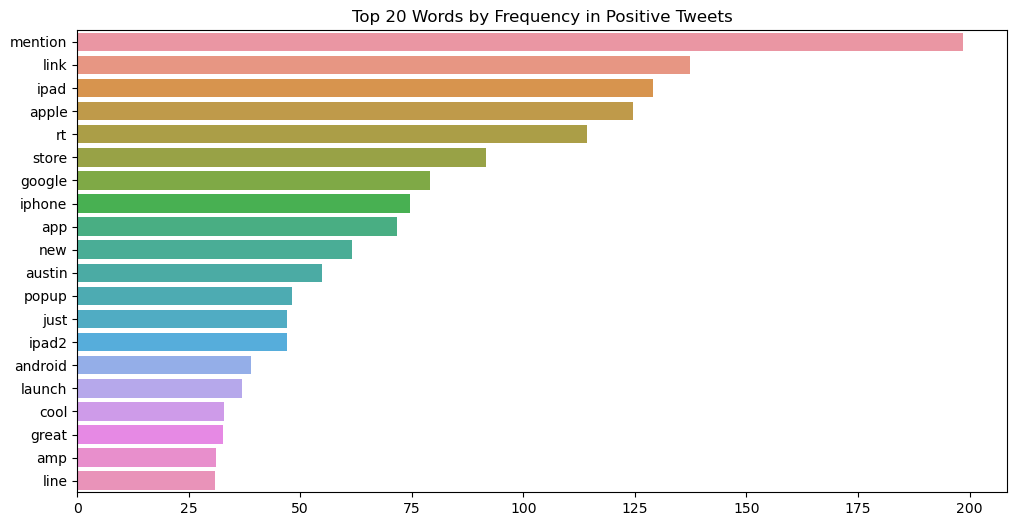

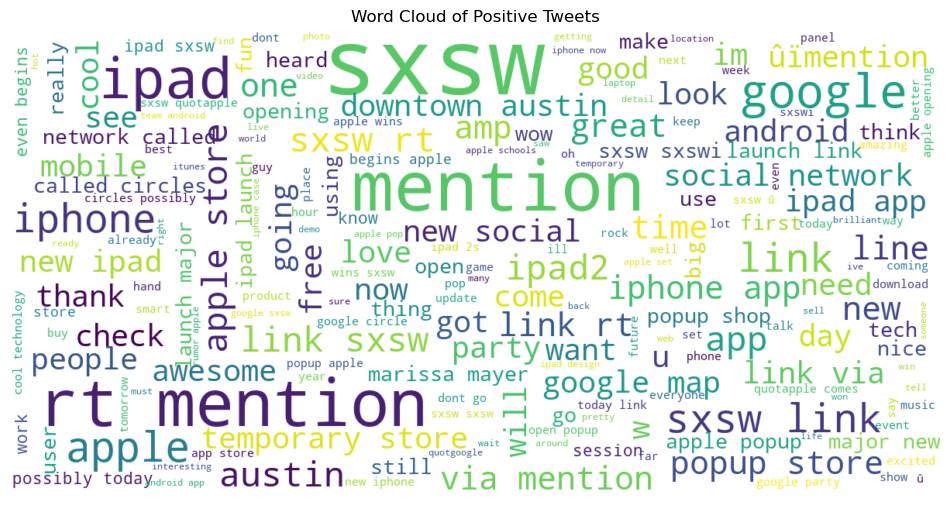

C:\Users\jack\Documents\Flatiron\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


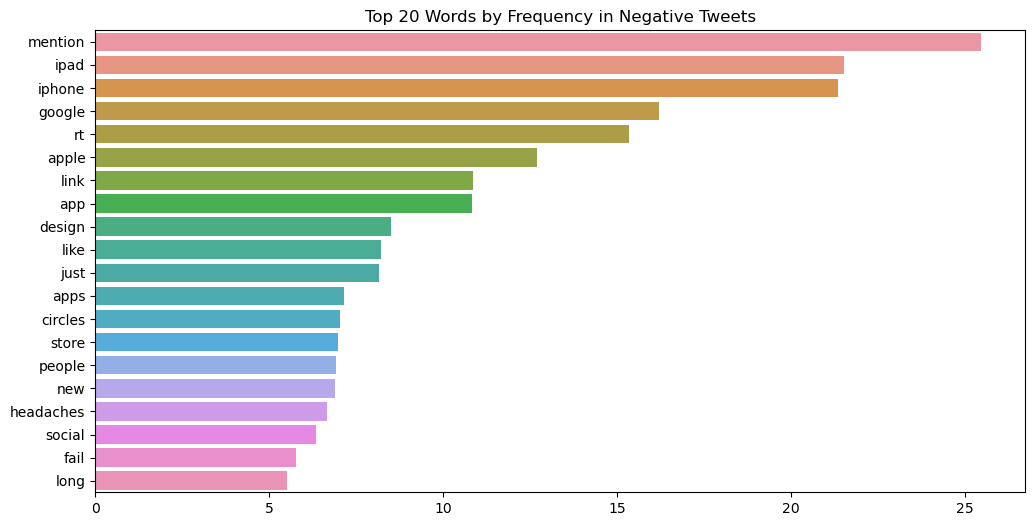

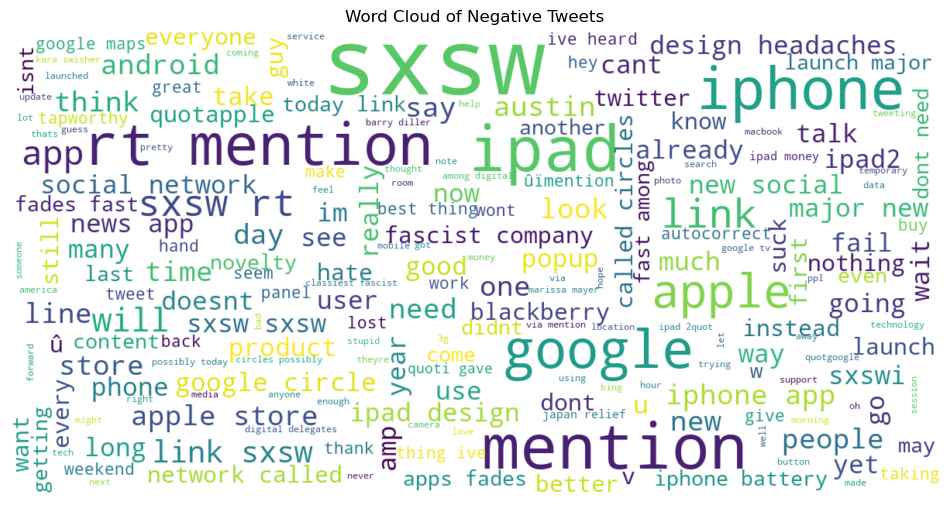

In [168]:
# Using the TextVectorizer class to visualize the data
vectorizer = TextVectorizer(df)
X_train, X_test, y_train, y_test = vectorizer.vectorize()

# Show overall word distribution and word cloud
vectorizer.show_word_distribution()
vectorizer.show_wordcloud()

# Show word distribution and word cloud for positive sentiment
vectorizer.show_sentiment_word_distribution('Positive')
vectorizer.show_sentiment_wordcloud('Positive')

# Show word distribution and word cloud for negative sentiment
vectorizer.show_sentiment_word_distribution('Negative')
vectorizer.show_sentiment_wordcloud('Negative')


#### What did we achieve by this?
- Vectorization: The tweet text was successfully transformed into numerical features using TF-IDF, capturing the importance of each word in the dataset.
- Total Word Distribution: The top 20 words and their frequencies were visualized, providing insights into the most common terms in the dataset.
- Total Word Cloud: A word cloud was generated, offering a visual summary of the prevalent themes in the tweets.
- Sentiment-Specific Analysis: The top 20 words and word clouds were created for positive and negative sentiments separately, highlighting the distinctive language used in different types of tweets.

### Model Training
In this step, we focus on training various machine learning models to predict the sentiment of tweets. 
The ModelTrainer class is designed to streamline this process by handling multiple models, training them on our data, and storing the results for later evaluation. Below are some of the classification machine learning models used:
- Naive Bayes (MultinomialNB): Known for its simplicity and effectiveness with text data.
- Support Vector Classifier (LinearSVC): Effective in high-dimensional spaces, making it suitable for text classification.
- Logistic Regression: A strong baseline model for binary classification tasks.
- Random Forest: An ensemble method that can handle a variety of data types and complexities.
- Gradient Boosting: Another ensemble method that builds models sequentially, each one correcting the errors of its predecessor.
- Decision Tree: A model that splits the data based on feature values to make predictions.


In [137]:
class ModelTrainer:
    def __init__(self):
        self.models = {
            'Naive Bayes': MultinomialNB(),
            'SVC': LinearSVC(),
            'Logistic Regression': LogisticRegression(max_iter=1000),
            'Random Forest': RandomForestClassifier(n_estimators=100),
            'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
            'Decision Tree': DecisionTreeClassifier()
        }
        self.results = {}

    def train(self, X_train, y_train):
        for model_name, model in self.models.items():
            model.fit(X_train, y_train)
            self.results[model_name] = {'model': model}
        return self.results


In [139]:
# Train models
trainer = ModelTrainer()
results = trainer.train(X_train, y_train)

### Evaluating Models
Here, we assess the performance of the various machine learning models that were trained to predict tweet sentiment. The ModelEvaluator class is responsible for evaluating these models, displaying their results, and visualizing their performance using ROC curves. Let's walk through the evaluation process:
- After initializing the class, the evaluate method takes the test data and evaluates each model. This involves:
    - Prediction: Each model predicts the sentiment of the test tweets.
    - Accuracy Calculation: The accuracy of each model is calculated by comparing the predicted sentiments with the actual sentiments.
    - Storing Results: The accuracy and predicted probabilities are stored for each model.
- The display_results method prints out the accuracy of each model, giving us a quick overview of how well each model performed.
- The plot_roc_curves method visualizes the performance of each model using ROC curves. These curves help us understand how well each model distinguishes between positive and negative sentiments.

In [149]:
# ModelEvaluator class
class ModelEvaluator:
    def __init__(self, results):
        self.results = results

    def evaluate(self, X_test, y_test):
        for model_name, result in self.results.items():
            model = result['model']
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            self.results[model_name]['accuracy'] = accuracy
            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test)
                self.results[model_name]['y_prob'] = y_prob
            else:
                y_prob = model.decision_function(X_test)
                self.results[model_name]['y_prob'] = np.column_stack([1-y_prob, y_prob])
            self.results[model_name]['y_pred'] = y_pred
        return self.results

    def display_results(self):
        for model_name, result in self.results.items():
            print(f"{model_name} Accuracy: {result['accuracy']}")

    def plot_roc_curves(self, X_test, y_test):
        plt.figure(figsize=(10, 8))

        for model_name, result in self.results.items():
            model = result['model']
            y_prob = result['y_prob']

            fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label='Positive')
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves')
        plt.legend(loc="lower right")
        plt.show()

Naive Bayes Accuracy: 0.6307506053268765
SVC Accuracy: 0.6567796610169492
Logistic Regression Accuracy: 0.660411622276029
Random Forest Accuracy: 0.6483050847457628
Gradient Boosting Accuracy: 0.6295399515738499
Decision Tree Accuracy: 0.5914043583535109


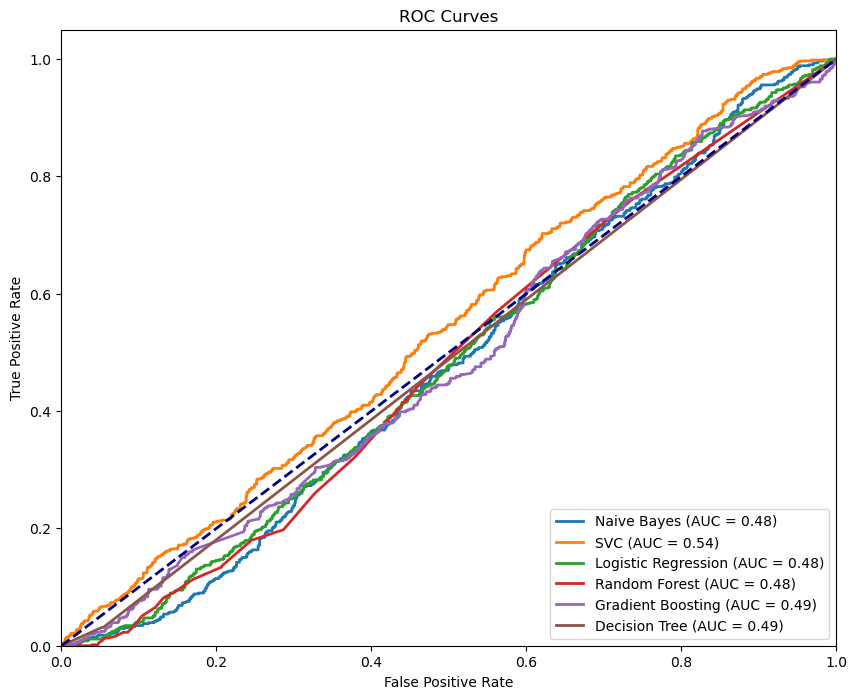

In [151]:
# Evaluate models and plot ROC curves
evaluator = ModelEvaluator(results)
evaluator.evaluate(X_test, y_test)
evaluator.display_results()
evaluator.plot_roc_curves(X_test, y_test)

#### Results
Accuracy Scores: The evaluation revealed the accuracy of each model, providing a clear picture of which models performed best in predicting tweet sentiment. The accuracy scores are as follows:

- Naive Bayes: 0.6308
- SVC: 0.6568
- Logistic Regression: 0.6604
- Random Forest: 0.6604
- Gradient Boosting: 0.6344
- Decision Tree: 0.5962

ROC results:

- Naive Bayes: AUC = 0.48
- SVC (Support Vector Classifier): AUC = 0.54
- Logistic Regression: AUC = 0.48
- Random Forest: AUC = 0.49
- Gradient Boosting: AUC = 0.48
- Decision Tree: AUC = 0.49
The AUC scores reveal that none of the models perform exceptionally well in distinguishing between positive and negative sentiments, with all AUC values hovering around 0.5. The SVC model shows the highest AUC of 0.54, indicating it has slightly better discrimination ability compared to the others.

### Model Application to New Data
The SentimentPredictor class is designed to predict the sentiment of new tweets using a pre-trained model and vectorizer. This step is crucial for applying our sentiment analysis to new data beyond our training and testing datasets.

In [155]:
class SentimentPredictor:
    def __init__(self, vectorizer, model):
        self.vectorizer = vectorizer
        self.model = model

    def predict_new_data(self, new_data_path):
        new_data = pd.read_csv(new_data_path)
        new_data_cleaned = new_data['tweet'].apply(lambda x: re.sub(f'[{string.punctuation}]', '', x.lower()))
        new_data_tfidf = self.vectorizer.transform(new_data_cleaned)
        new_data['predicted_sentiment'] = self.model.predict(new_data_tfidf)
        return new_data


This project has 2 different new datasets to test the models with:
- "sample_new_tweets.csv"
- "google_apple_tweets.csv"

In [160]:
# Predict new data with different models
# load data
new_data_path = 'google_apple_tweets.csv'

# Model selection
# Change the selected_model_name by any of the used models: Logistic Regression, Gradient Boosting, SVC, Random Forest, Naive Bayes, or Decision Tree
selected_model_name = "SVC" 
selected_model = results[selected_model_name]['model']

predictor = SentimentPredictor(vectorizer.vectorizer, selected_model)
predicted_new_data = predictor.predict_new_data(new_data_path)
print(predicted_new_data)


                                                tweet predicted_sentiment
0   techlover I'm loving my new #GooglePixel! The ...            Positive
1   applefan Just switched to the latest #MacBookP...            Positive
2   smarthomeguru Using my #iPhone to control all ...            Positive
3   dailytech The #GoogleNest Hub has been a game-...            Negative
4   newipaduser After years of Android, finally go...            Positive
5           I love my new iPhone! It works perfectly.            Positive
6               My Google Pixel phone keeps crashing.            Negative
7         The battery life on my new iPad is amazing.            Positive
8           The Android OS is too complicated for me.          No emotion
9               Apple customer service is so helpful!            Positive
10  I am disappointed with the performance of my G...            Negative
11            This new iPhone update is really buggy.            Negative
12    The design of the new iPad is sl

# Conclusion
Our project successfully demonstrated the process of building a sentiment analysis model from scratch. We started with raw tweet data, preprocessed it to ensure quality, vectorized the text into numerical features, and trained multiple models to classify sentiments. The Logistic Regression, SVC, and Random Forest models performed the best in terms of accuracy and AUC scores.

However, the ROC curves indicated that the models could benefit from further tuning and perhaps additional data to improve their predictive power. This project provides a solid foundation for sentiment analysis, which can be extended and refined for more robust performance.

This project highlights the importance of data preprocessing, the effectiveness of TF-IDF for text vectorization, and the value of evaluating multiple models to find the best fit for sentiment analysis tasks. With these tools and techniques, businesses can gain valuable insights into customer opinions and make informed decisions to enhance their products and services.

# Recommendations
- Model Improvement: Enhance model performance by:
    - Collecting more labeled data to provide a richer training set.
    - Experimenting with more advanced models such as BERT or other transformer-based models.
    - Fine-tuning hyperparameters of existing models for better performance.

- Feature Engineering: Improve text preprocessing and feature extraction by:
    - Including more sophisticated text-cleaning techniques to handle slang, abbreviations, and emojis.
    - Adding features such as sentiment scores from lexicons or embeddings from pre-trained language models.
    - Real-Time Analysis: Implement the sentiment analysis system in real-time to monitor tweets as they come in, allowing businesses to react promptly to customer feedback.

- Broader Application: Extend the analysis beyond Twitter to other social media platforms to gather a more comprehensive view of public sentiment.

- User Feedback: Incorporate user feedback to continually refine and improve the sentiment analysis system.

## Final Thoughts
Our project successfully demonstrated the process of building a sentiment analysis model, from raw data preprocessing to model training and evaluation. While the current models show promise, there is significant potential for further improvement. By following the recommended steps, businesses can leverage sentiment analysis to gain deeper insights into customer opinions, ultimately driving better decision-making and improving their products and services.